**Locally Weighted Regression (LWR):**
LWR is a non-parametric method that adapts the model locally to the data points, assigning different weights to different points based on their proximity to the target point. In this blog post, we’ll delve into the intricacies of Locally Weighted Regression, understand its mechanics, and explore its application

**Locally Weighted Regression (LWR)** is a type of regression analysis used when the data exhibit heteroscedasticity, meaning the variance around the regression line is not constant. Unlike traditional regression methods that globally fit a function to all data points, LWR fits a separate regression model for each query point, with the model’s parameters dependent on that query point.

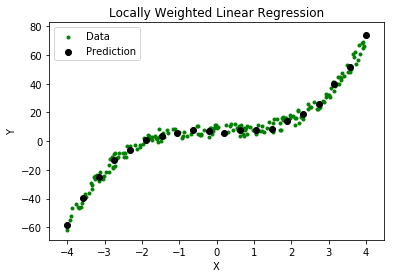

**Steps involved in locally weighted linear regression are:**


Compute      to minimize the cost.
image.png




Predict Output: for given query point x,image.png

### **9.Implement the non-parametric Locally Weighted Regression algorithm in order to fit datapoints. Select appropriate data set for your experiment and draw graphs.**

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
5       25.29  4.71    Male     No  Sun  Dinner     4
6        8.77  2.00    Male     No  Sun  Dinner     2
7       26.88  3.12    Male     No  Sun  Dinner     4
8       15.04  1.96    Male     No  Sun  Dinner     2
9       14.78  3.23    Male     No  Sun  Dinner     2



Basic Statistics:
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


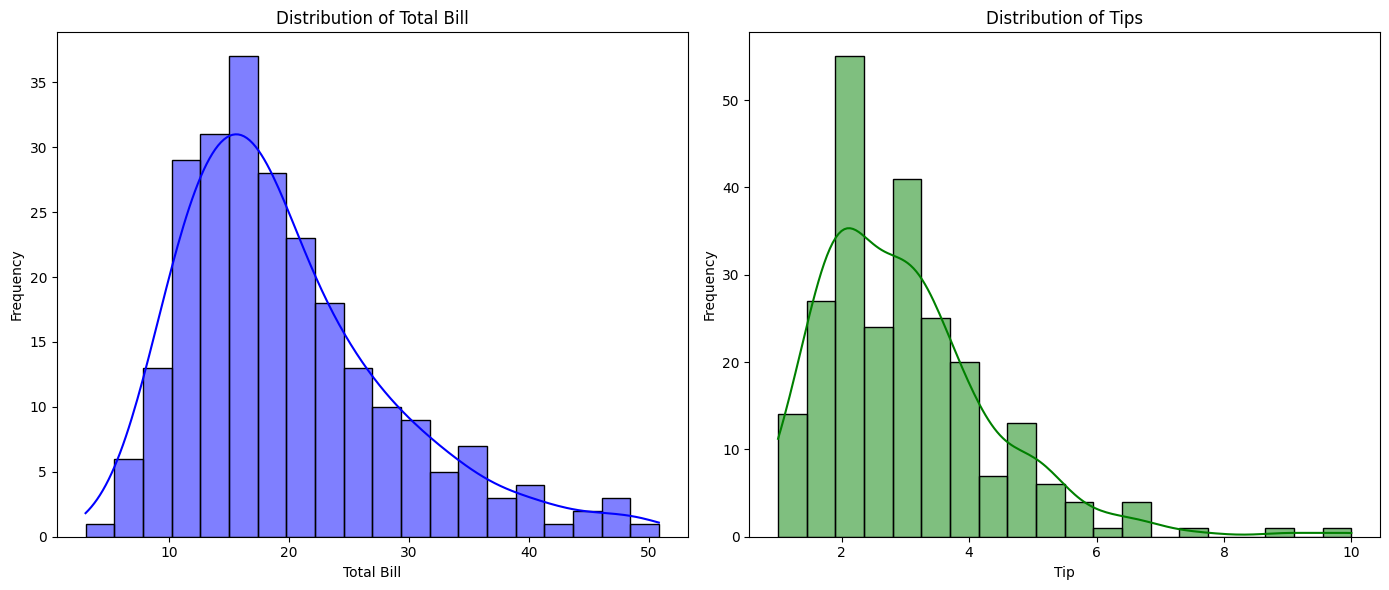

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Load data points
data = pd.read_csv('/content/Lab9.csv')

# If you want to print a specific number of rows (e.g., the first 10 rows)
print(data.head(10))

print("\n" * 2)

# Basic EDA
print("Basic Statistics:")
print(data.describe())

# Visualize distributions of total_bill and tip
plt.figure(figsize=(14, 6))

# Histogram for total_bill
plt.subplot(1, 2, 1)
sns.histplot(data['total_bill'], bins=20, kde=True, color='blue')
plt.title('Distribution of Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Frequency')

# Histogram for tip
plt.subplot(1, 2, 2)
sns.histplot(data['tip'], bins=20, kde=True, color='green')
plt.title('Distribution of Tips')
plt.xlabel('Tip')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



<ipython-input-2-c470eca1cbfc>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  weights[j, j] = np.exp(diff * diff.T / (-2.0 * k ** 2))
<ipython-input-2-c470eca1cbfc>:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ypred[i] = xmat[i] @ localWeight(xmat[i], xmat, ymat, k)


Mean Absolute Error (MAE): 0.5715
R-squared (R²): 0.7007


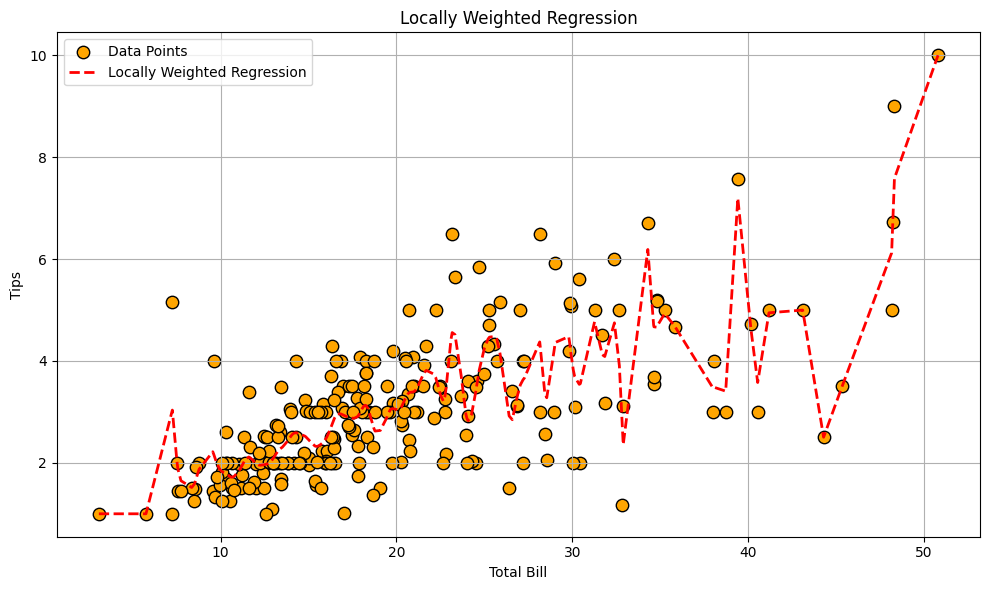

In [2]:
# Kernel function for weighting the points based on distance
def kernel(point, xmat, k):
    m, n = np.shape(xmat)
    weights = np.mat(np.eye(m))
    for j in range(m):
        diff = point - xmat[j]
        weights[j, j] = np.exp(diff * diff.T / (-2.0 * k ** 2))
    return weights

# Function for calculating local weight
def localWeight(point, xmat, ymat, k):
    wei = kernel(point, xmat, k)
    XTWX = xmat.T @ (wei @ xmat)

    # Add regularization to prevent singular matrix error
    regularization = 1e-5 * np.eye(XTWX.shape[0])

    W = np.linalg.pinv(XTWX + regularization) @ (xmat.T @ (wei @ ymat.T))
    return W

# Locally weighted regression function
def localWeightRegression(xmat, ymat, k):
    m, n = np.shape(xmat)
    ypred = np.zeros(m)
    for i in range(m):
        ypred[i] = xmat[i] @ localWeight(xmat[i], xmat, ymat, k)
    return ypred

# Preparing data and adding a column of ones to the bill (for bias term)
bill = np.array(data.total_bill)
tip = np.array(data.tip)
mbill = np.mat(bill)
mtip = np.mat(tip)  # Convert to 2-dimensional array
m = np.shape(mbill)[1]

# Add a column of ones to the feature matrix
one = np.mat(np.ones(m))
X = np.hstack((one.T, mbill.T))  # Stack ones and bill to create X matrix

# Set the bandwidth parameter k
ypred = localWeightRegression(X, mtip, 0.3)

# Sort values for plotting
SortIndex = X[:, 1].argsort(0)
xsort = X[SortIndex][:, 0]

# Calculate accuracy metrics
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def r_squared(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

mae = mean_absolute_error(tip, ypred)
r2 = r_squared(tip, ypred)

# Display accuracy metrics
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Plot the data points and the locally weighted regression curve
fig = plt.figure(figsize=(10, 6))  # Increase the figure size for better visibility
ax = fig.add_subplot(1, 1, 1)

# Change scatter plot style
ax.scatter(bill, tip, color='orange', edgecolor='black', s=80, marker='o', label='Data Points')

# Change line style for regression curve
ax.plot(xsort[:, 1], ypred[SortIndex], color='red', linewidth=2, linestyle='--', label='Locally Weighted Regression')

# Add grid for better readability
ax.grid(True)

# Add title and legend
plt.title('Locally Weighted Regression')
plt.xlabel('Total Bill')
plt.ylabel('Tips')
plt.legend()
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()